# Kaggle tutorial

황인서
2019-01-12
***

In [0]:
# 데이터 처리 : Pandas
# 시각화 : Matplotlib, Seaborn
# 머신러닝 : scikit-learn(sk learn)
# 딥러닝 : tensorflow, pytorch(속도좋음), keras(쉬움, 사용자많음, 비전공자)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

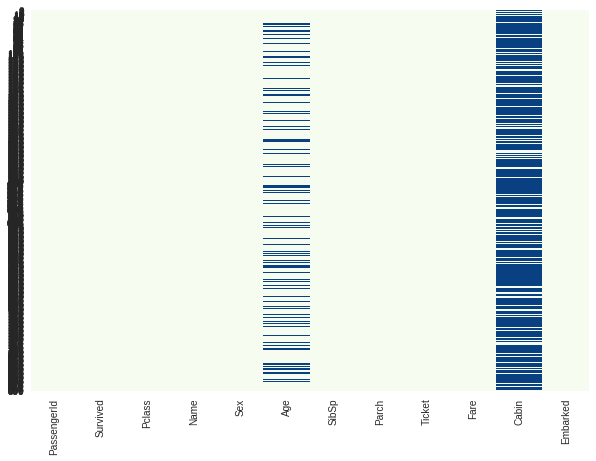

In [187]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(), cbar=False, cmap="GnBu")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


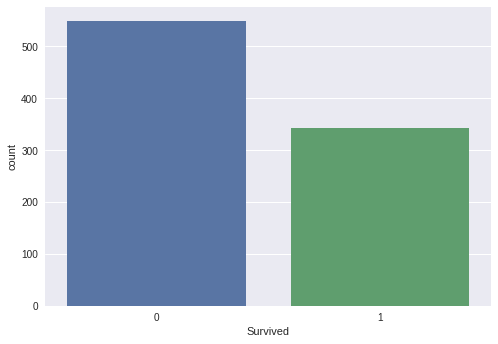

In [188]:
sns.countplot(x="Survived", data=train)

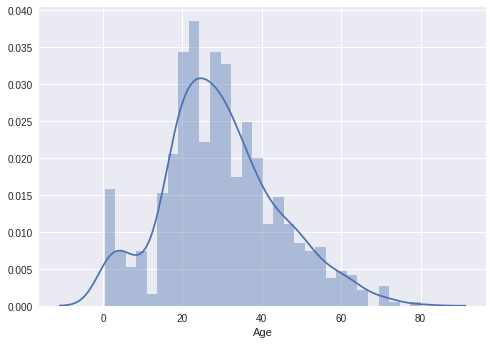

In [189]:
sns.distplot(train['Age'].dropna(), bins=30)

In [190]:
print(train.shape, test.shape)

(891, 12) (418, 11)


In [191]:
print(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [192]:
print(train.describe(), test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200          PassengerId      Pclass         Age       SibSp       Parch        Fare
co

In [193]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [194]:
print(test.columns)
#survived가 없음 에측해야하는 입력값

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [195]:
#결측치, 비어있는 행을 지워줘야 한다. 전처리중 하나
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [196]:
#평가용 데이터는 결측지가 있어도 어쩔수 없이 써야함
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 결측치 처리
최빈값, 중앙값, 평균값

In [0]:
#mean_val = train['Age'].mean()
#train['Age'] = train['Age'].fillna(mean_val)
#mean_val = test['Age'].mean()
#test['Age'] = test['Age'].fillna(mean_val)

In [0]:
# 결측치 처리 (승선항) 최빈값으로 채우기
#val_Embarked = train['Embarked'].value_counts()
#train['Embarked'] = train['Embarked'].fillna('S')
#test['Embarked'] = test['Embarked'].fillna('S')

In [0]:
#mean_val = train['Fare'].mean()
#train['Fare'] = train['Fare'].fillna(mean_val)
#mean_val = test['Fare'].mean()
#test['Fare'] = test['Fare'].fillna(mean_val)

In [0]:
#문자는 숫자로 바꿔서 넣어줘야함
train['Sex'] = train['Sex'].map({'female':0, 'male':1}).astype(int)
test['Sex'] = test['Sex'].map({'female':0, 'male':1}).astype(int)

In [0]:
train['Age'] = train['Age'].dropna(how='any') 
test['Age'] = test['Age'].dropna(how='any') 
train['Embarked'] = train['Embarked'].dropna(how='any') 
test['Embarked'] = test['Embarked'].dropna(how='any') 
train['Fare'] = train['Fare'].dropna(how='any') 
test['Fare'] = test['Fare'].dropna(how='any') 

In [202]:
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked']= test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

ValueError: ignored

In [0]:
train['Fare'] = train['Fare'].astype(int)
test['Fare']= test['Fare'].astype(int)

In [0]:
## 나이에 대한 int 처리
train['Age'] = train['Age'].astype('int')
test['Age'] = test['Age'].astype('int')

# 모델 만들고 제출해보기
* 모델(sklearn)
* 모델 만들고, 학습(fit())
* 값 예측(predict())

In [0]:
train.columns

In [0]:
# import sklearn.linear_model.LogisticRegression
from sklearn.linear_model import LogisticRegression
sel = ['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'Embarked', 'Sex' ]

X_train = train[sel]
y_train = train['Survived']
X_test =  test[sel]
X_test

In [0]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [0]:
pred = model.predict(X_test)
pred[1:20]

In [0]:
sub = pd.read_csv("gender_submission.csv")
sub.head(15)

In [0]:
sub['Survived'] = pred
sub.head(15)

In [0]:
sub.to_csv("secondeModel.csv", index=False)

In [0]:
ls -ltr